<a href="https://colab.research.google.com/github/Rezhiel/machinelearning-az/blob/master/Ejercicio_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn import metrics

In [4]:
Mean_Naranjas = 20
Mean_Mandarinas = 15

Desvio_Naranjas = 3
Desvio_Mandarinas = 2

In [26]:
np.random.seed(1)
A = np.random.normal(loc=Mean_Naranjas,scale=Desvio_Naranjas, size= 100)
B = np.random.normal(loc=Mean_Mandarinas,scale=Desvio_Mandarinas, size= 100)

In [30]:
df1 = pd.DataFrame({'Tag':'Naranjas','Valores':A})
df2 = pd.DataFrame({'Tag':'Mandarinas','Valores':B})

In [35]:
df = pd.concat([df1,df2],ignore_index=True)

In [42]:
Umbral = Mean_Naranjas - Desvio_Naranjas

In [49]:
def prediccion(Umbral):
 a = pd.Series(0 if x<Umbral else 1 for x in df['Valores'])
 return a

In [52]:
df['prediccion_1'] = prediccion(Umbral+2)
df['prediccion_2']= prediccion(Umbral+1)
df['prediccion_3']=prediccion(Umbral)
df['prediccion_4']=prediccion(Umbral-1)

In [53]:
df

,Tag,Valores,prediccion_1,prediccion_2,prediccion_3,prediccion_4
0,Naranjas,24.873036,1,1,1,1
1,Naranjas,18.164731,0,1,1,1
2,Naranjas,18.415485,0,1,1,1
3,Naranjas,16.781094,0,0,0,1
4,Naranjas,22.596223,1,1,1,1
...,...,...,...,...,...,...
195,Mandarinas,11.745123,0,0,0,0
196,Mandarinas,16.204639,0,0,0,1
197,Mandarinas,15.840564,0,0,0,0
198,Mandarinas,16.621903,0,0,0,1


In [61]:
label = pd.Series(1 if x == "Naranjas" else 0 for x in df['Tag'])

In [62]:
label

0      1
1      1
2      1
3      1
4      1
      ..
195    0
196    0
197    0
198    0
199    0
Length: 200, dtype: int64

In [72]:
Prediccion_1= df['prediccion_1'].values
Prediccion_2= df['prediccion_2'].values
Prediccion_3= df['prediccion_3'].values
Prediccion_4= df['prediccion_4'].values


In [97]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(label,Prediccion_1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(label,Prediccion_2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(label,Prediccion_3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(label,Prediccion_4)

In [84]:
fpr

array([0.   , 0.345, 1.   ])

In [99]:
x = [0,fpr1[1],fpr2[1],fpr3[1],fpr4[1],1]
y = [0,tpr1[1],tpr2[1],tpr3[1],tpr4[1],1]



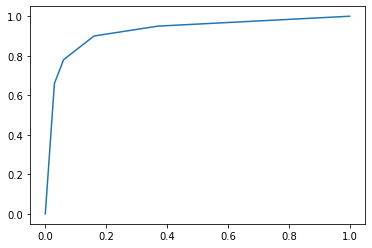

In [100]:
plt.plot(x,y)